# IMPORTANT

In [1]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

In [2]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
from pandas.stats.api import ols
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

Answer:

a) If the posterior distribution and the prior probability distribution lies in the same parametric family, then the prior and posterior are called as conjugate distributions. The prior is called a conjugate prior for the likelihood function.

b) True.

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False)  
    a) Using a Laplacian prior will lead to the Ridge Regression  
    b) Using a Laplacian prior will lead to Lasso Regression

2) (True or False)  
    a) Ridge can often help with feature selection  
    b) Lasso can often help with feature selection

Answer:

1) a) False b) True

2) a) False b) True 

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  
1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

Answer:

a) Ridge regression

b) Lasso regression

2) Ridge regression

3) Lasso regression

4) $\lambda = 0$ 

5) validation set

# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

Answer: 

Ridge regression.

Because when multicollinearity happens, least squares estimates are unbiased, and the variances of the estimates will be large and far from true values. Using Ridge regresion method will add a degree of bias to the regression estimates, therefore reduces the standard errors. The calculated estimates will be much smaller and be more reliable.

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

In [3]:
RE11w = 4
RE11s = 2
sigma = 2
y = 14
x = 4

In [4]:
print('w ~ N({0},{1})'.format(RE11w,RE11s))

w ~ N(4,2)


In [5]:
#consider the remaining part of the housing prices data separately
#and compute the OLS estimate
RE12w0=sum(x*y)/sum(x**2)
print('Estimated w={0}'.format(RE12w0))

Estimated w=3


In [6]:
#now implement Bayesian regression starting from the prior obtained based on the first sample w ~ N(369.713904612,18.293523802)
s22=sigma**-2; s12=RE11s**-2
RE12w=(s22*sum(x*y)+s12*RE11w)/(s22*sum(x**2)+s12)
RE12s=(s22*sum(x**2)+s12)**(-0.5)
print('w ~ N({0},{1})'.format(RE12w,RE12s))

w ~ N(3.52941176471,0.485071250073)


In [7]:
import scipy.stats
pl = scipy.stats.norm(3.52941176471,0.485071250073).cdf(4)
print('probability of having  w<4 is {} '.format(pl))

probability of having  w<4 is 0.834012266456 


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [8]:
import pandas as pd
import numpy as np

data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

data_train.columns = 'X' + data_train.columns
data_test.columns = 'X' + data_test.columns

In [9]:
#result = smf.ols(formula = 'data_train.X40 ~ '+ '+'.join(data_train.columns[:-1]), data = data_train).fit()
result = smf.ols(formula = 'X40~{}-1'.format('+'.join(data_train.columns[:-1])),data=data_train).fit()
OLS_coef=result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    X40   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 29 Nov 2017   Prob (F-statistic):                nan
Time:                        02:43:18   Log-Likelihood:                 812.26
No. Observations:                  30   AIC:                            -1565.
Df Residuals:                       0   BIC:                            -1522.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X0             2.3096        inf          0        n

In [10]:
# An anonymous function that returns your regression model for future usage
Regress = lambda feature: smf.ols(formula = 'X40 ~ %s'%feature, data = data_train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'X40'):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [11]:
#result = smf.ols(formula = 'Y ~ '+ '+'.join(data3.columns[:-1]), data = train).fit()
result = smf.ols(formula = 'X40~{}-1'.format('+'.join(data_train.columns[:-1])),data=data_train).fit()
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result))
print('Fitted coefficients:')
print result.params

In sample R-squared: 1.000000
Out of sample R-squared: -1.027964
Fitted coefficients:
X0     2.309618
X1     4.714915
X2    -1.605535
X3    -0.952359
X4    -4.017720
X5    -0.238134
X6    -1.756060
X7    -2.152114
X8    -1.024855
X9    -0.478782
X10    2.362976
X11    1.222944
X12   -0.547568
X13    1.570712
X14   -1.582677
X15   -2.189135
X16   -2.251809
X17   -2.251971
X18    0.082258
X19   -2.077975
X20    1.494313
X21    0.215305
X22    0.058794
X23    0.116286
X24    0.181049
X25    0.079979
X26    0.078714
X27   -0.268590
X28   -0.134989
X29   -0.005605
X30   -0.030090
X31   -0.024276
X32    0.135952
X33   -0.016106
X34   -0.155001
X35   -0.137355
X36   -0.334650
X37    0.017861
X38   -0.141513
X39   -0.036982
dtype: float64


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [12]:
X_train = data_train.ix[:,:-1]
X_test = data_test.ix[:,:-1]
y_train = data_train.ix[:,-1]
y_test = data_test.ix[:,-1]

In [13]:
Ridge=linear_model.Ridge(fit_intercept=False, alpha=3000) 
Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.91834582591
The R-squared we found for OS Ridge is: 0.522772634124


In [14]:
Ridge_coef

array([ 0.04581931,  0.05477618,  0.01435885,  0.02064327, -0.03084745,
        0.00073263,  0.04788195,  0.02440159,  0.05870587,  0.00601161,
       -0.02375939,  0.01228275, -0.06071097,  0.00598686, -0.01022467,
        0.02239075, -0.008213  , -0.02701643, -0.04583362,  0.0096247 ,
        0.05380074,  0.00684908,  0.09426863,  0.03979098,  0.07756087,
        0.04641081,  0.03641501, -0.11586306,  0.00502122,  0.05443002,
       -0.04341751,  0.00425866,  0.18558462, -0.0646435 ,  0.00372971,
       -0.03675843, -0.06028575,  0.00463377, -0.00386455, -0.05549372])

In [15]:
Lasso=linear_model.Lasso(fit_intercept=False,alpha=30)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.91834582591
The R-squared we found for OS Lasso is: 0.63746274109


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [16]:
Lasso_coef

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.13648652,  0.        ,  0.20349595,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.07284743,  0.        ,  0.0489062 ,
        0.00229869,  0.02439073, -0.07009491,  0.01340973,  0.00776354,
       -0.        ,  0.        ,  0.14545641, -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.04060006])

# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


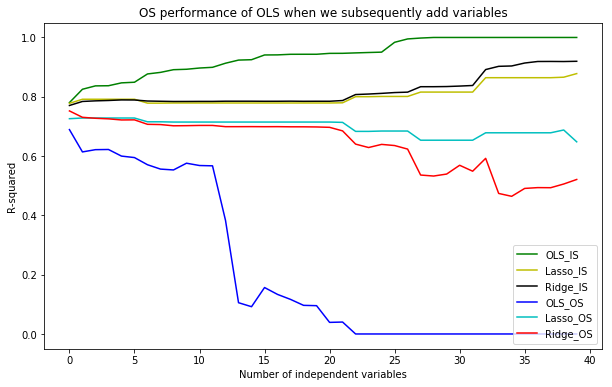

In [17]:
Number_variables=range(len(data_train.columns[:-1]))
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Ridge=linear_model.Ridge(fit_intercept=True,alpha=3000)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=30)

for j in Number_variables:
    # OLS
    lm = smf.ols(formula = 'X40 ~ '+ '+'.join(data_train.columns[:j+1]), 
                 data = pd.concat([X_train.ix[:,:j+1],y_train], axis = 1)).fit()
    error = lm.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

plt.figure(figsize=(10,6))
plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Find the Alpha and report best test performance for Ridge/Lasso.
np.random.seed(200)
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.3,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.3)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')
        #plt.xlim(0, 450000)
        plt.ylim(0.45, 0.9)
        plt.show()
        
    return best_lambda, best_R2

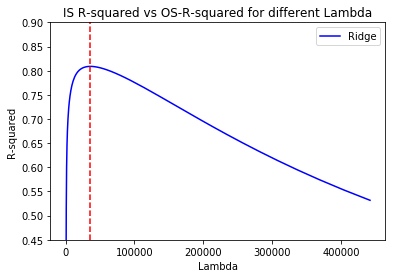

Optimal lambda for Ridge=35148.481067


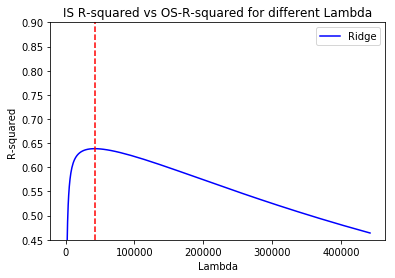

Optimal lambda for Ridge=42118.4516881


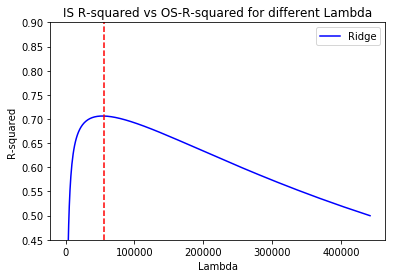

Optimal lambda for Ridge=55248.5839921


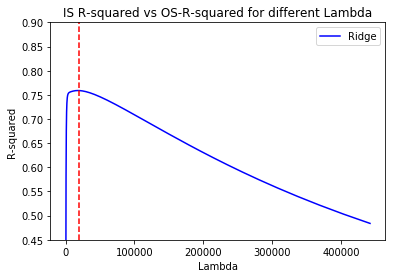

Optimal lambda for Ridge=18660.6228788


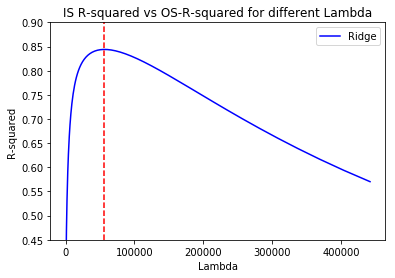

Optimal lambda for Ridge=55248.5839921


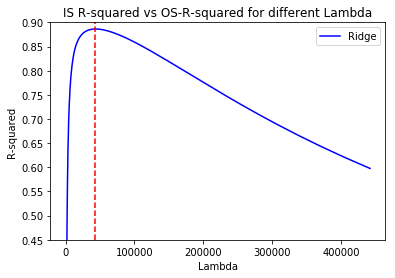

Optimal lambda for Ridge=42118.4516881


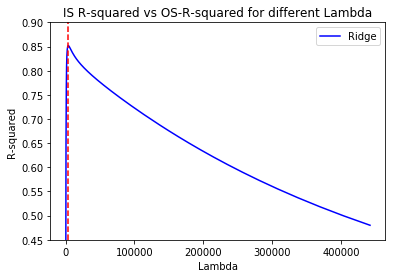

Optimal lambda for Ridge=4009.7429342


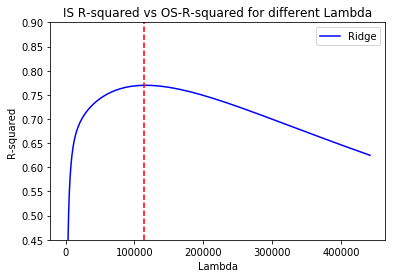

Optimal lambda for Ridge=113915.939252


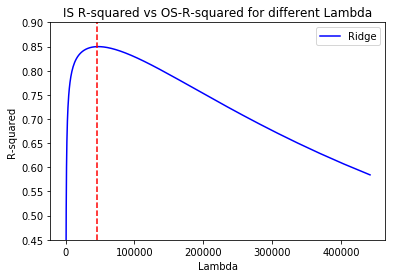

Optimal lambda for Ridge=46105.7738496


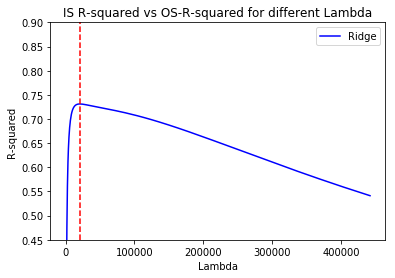

Optimal lambda for Ridge=20427.2100198


In [20]:
best_lambda_Ridge = []
best_R2_Ridge = []
for i in range(0,10):
    lambdas = np.exp(np.linspace(-5,13,200))
    r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.3,Graph=True)
    print('Optimal lambda for Ridge={0}'.format(r_optimal[0]))
    best_lambda_Ridge.append(r_optimal[0])
    best_R2_Ridge.append(r_optimal[1])

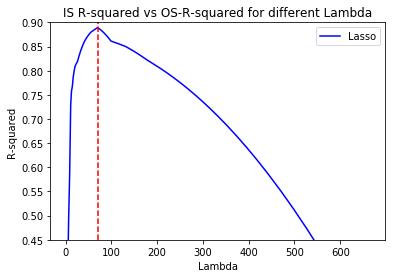

Optimal lambda for Lasso=69.8416932388


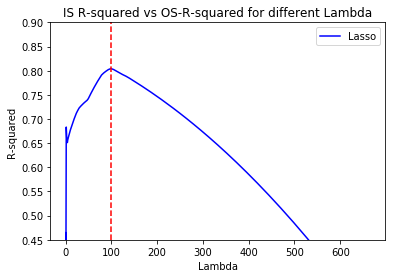

Optimal lambda for Lasso=98.7868821444


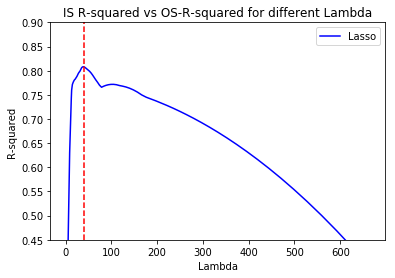

Optimal lambda for Lasso=39.1868687003


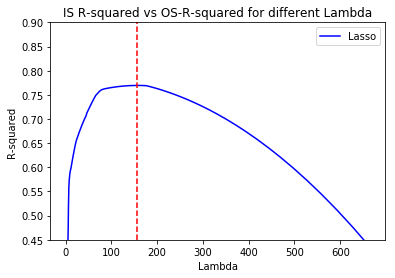

Optimal lambda for Lasso=156.847874269


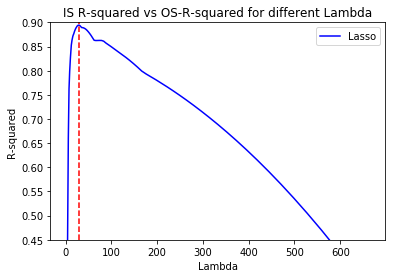

Optimal lambda for Lasso=29.3530654345


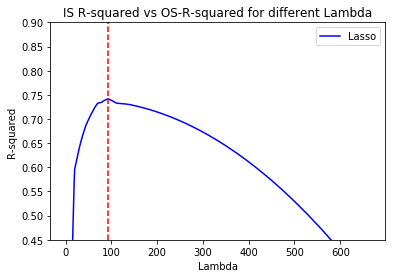

Optimal lambda for Lasso=93.239912842


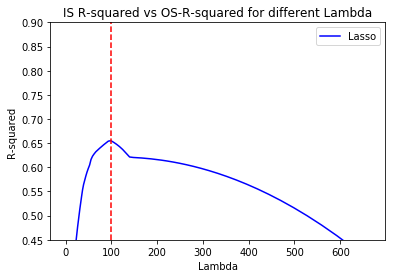

Optimal lambda for Lasso=98.7868821444


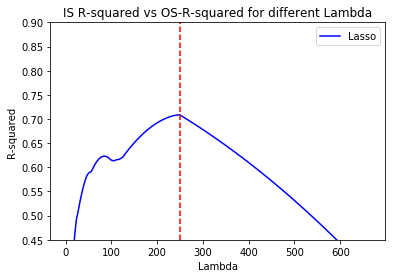

Optimal lambda for Lasso=249.033628036


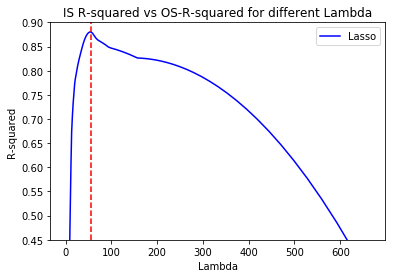

Optimal lambda for Lasso=55.4274731953


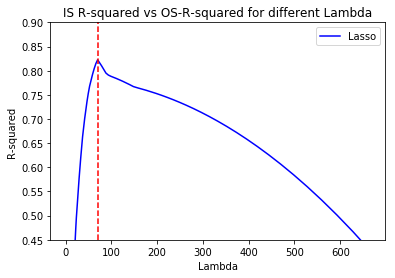

Optimal lambda for Lasso=69.8416932388


In [21]:
#select lambdas for Lasso 
best_lambda_Lasso = []
best_R2_Lasso = []
for i in range(0,10):
    lambdas=np.exp(np.linspace(-5,6.5,200))
    l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.3,Graph=True)
    print('Optimal lambda for Lasso={0}'.format(l_optimal[0]))
    best_lambda_Lasso.append(l_optimal[0])
    best_R2_Lasso.append(l_optimal[1])

In [22]:
lambda_r_optimal = best_lambda_Ridge[best_R2_Ridge.index(max(best_R2_Ridge))]

In [23]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal) #try Ridge with a selected regularization parameter lambda

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.850946141257
The R-squared we found for OS Ridge is: 0.695657938031


In [24]:
Ridge_coef

array([  3.05451104e-02,   2.94178871e-02,   1.17340888e-02,
         1.07160004e-02,  -1.67932647e-02,   5.78155545e-03,
         5.23182992e-02,   2.72901946e-02,   5.51013333e-02,
         9.54997054e-03,  -2.26269318e-02,   1.19364599e-02,
        -4.73620222e-02,  -2.83750126e-03,  -1.09298730e-02,
         2.74872494e-02,  -1.49691920e-03,  -1.31074987e-02,
        -5.35067308e-02,   1.00656773e-02,   4.26671929e-02,
         8.20948572e-03,   2.57653395e-02,   9.01504410e-03,
         1.95078265e-02,   4.98355348e-03,  -3.65413414e-03,
        -4.22591844e-02,   5.64447776e-03,   2.76740710e-03,
         7.93752317e-05,   3.44532039e-03,   5.89924007e-02,
        -1.88120825e-02,  -2.32760511e-03,   4.76683187e-03,
        -7.18060935e-03,  -1.66358733e-02,   1.70308622e-02,
        -3.84813260e-02])

In [25]:
lambda_l_optimal = best_lambda_Lasso[best_R2_Lasso.index(max(best_R2_Lasso))]

In [26]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.850946141257
The R-squared we found for OS Lasso is: 0.645656595556


In [27]:
Lasso_coef

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.32985051,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.03801005,  0.        ,  0.02381961,
        0.        ,  0.        , -0.10081654,  0.00494893,  0.        ,
       -0.        , -0.        ,  0.12124505, -0.        , -0.        ,
        0.        , -0.00072572, -0.01262557,  0.        , -0.05710028])